# Getting started with the eemeter library

This jupyter notebook is an interactive tutorial. It walks through loading data, running the CalTRACK methods, and plotting results. You'll run all the code yourself. Run through from the top and use `<shift><enter>` to run cells. If you feel so inspired, make edits and go deeper if you'd like.

In [1]:
# turn on inline plotting
%matplotlib inline

# allow live package editing
%load_ext autoreload
%autoreload 2

In [2]:
import eemeter

/usr/local/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Loading data

Let's load up some meter and temperature data from samples that come packaged with the eemeter. The samples we are loading up are three versions of the same underlying data - one as hourly data, one as daily data, and one as billing data. Each of these shares a core data format. We will walk through how use the eemeter package to obtain metered savings for each of these versions of the data.

*Note: the sample data is simulated, not real!*

In [3]:
meter_data_hourly, temperature_data_hourly, metadata_hourly = \
    eemeter.load_sample('il-electricity-cdd-hdd-hourly')

meter_data_daily, temperature_data_daily, metadata_daily = \
    eemeter.load_sample('il-electricity-cdd-hdd-daily')

meter_data_billing, temperature_data_billing, metadata_billing = \
    eemeter.load_sample('il-electricity-cdd-hdd-billing_monthly')

The metadata has project start and end that we can use to determine a baseline period.

In [4]:
baseline_end_date = metadata_billing['blackout_start_date']
baseline_end_date

datetime.datetime(2016, 12, 26, 0, 0, tzinfo=<UTC>)

The convention for formatting meter data is to create a [pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) with a [DatetimeIndex](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html) and a column of meter readings called `value`. The index datetime values represent the start dates of each metering period. The end of each period is the start of the next period, even for data with variable period lengths like billing data. The end date of the last period can be supplied by appending an extra period with the final end date and a NaN value. Missing data is represented by one or more periods of value NaN. Data should be sorted by time and deduplicated prior to use with eemeter.

In [5]:
meter_data_hourly.head()

,value
start,
2015-11-22 06:00:00+00:00,0.29
2015-11-22 07:00:00+00:00,1.47
2015-11-22 08:00:00+00:00,0.58
2015-11-22 09:00:00+00:00,0.28
2015-11-22 10:00:00+00:00,1.25


In [6]:
meter_data_daily.head()

,value
start,
2015-11-22 00:00:00+00:00,32.34
2015-11-23 00:00:00+00:00,23.80
2015-11-24 00:00:00+00:00,26.26
2015-11-25 00:00:00+00:00,21.32
2015-11-26 00:00:00+00:00,6.70


In [7]:
meter_data_billing.tail()

,value
start,
2017-09-26 06:00:00+00:00,526.25
2017-10-27 06:00:00+00:00,649.80
2017-11-25 06:00:00+00:00,650.52
2017-12-22 06:00:00+00:00,1393.40
2018-01-20 06:00:00+00:00,NaN


The convention for formatting temperature is as a [pandas Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html), also with a [DatetimeIndex](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html).

In [8]:
temperature_data_hourly.head()

dt
2015-11-22 06:00:00+00:00    21.01
2015-11-22 07:00:00+00:00    20.35
2015-11-22 08:00:00+00:00    19.38
2015-11-22 09:00:00+00:00    19.02
2015-11-22 10:00:00+00:00    17.82
Freq: H, Name: tempF, dtype: float64

In [9]:
temperature_data_daily.head()

dt
2015-11-22 06:00:00+00:00    21.01
2015-11-22 07:00:00+00:00    20.35
2015-11-22 08:00:00+00:00    19.38
2015-11-22 09:00:00+00:00    19.02
2015-11-22 10:00:00+00:00    17.82
Freq: H, Name: tempF, dtype: float64

In [10]:
temperature_data_billing.head()

dt
2015-11-22 06:00:00+00:00    21.01
2015-11-22 07:00:00+00:00    20.35
2015-11-22 08:00:00+00:00    19.38
2015-11-22 09:00:00+00:00    19.02
2015-11-22 10:00:00+00:00    17.82
Freq: H, Name: tempF, dtype: float64

## Plotting (part 1)

Let's use some eemeter plotting functions to see what our data looks like.

### Time series plots

(<matplotlib.axes._subplots.AxesSubplot at 0x7eff3f7db0b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7eff3d7a17f0>)

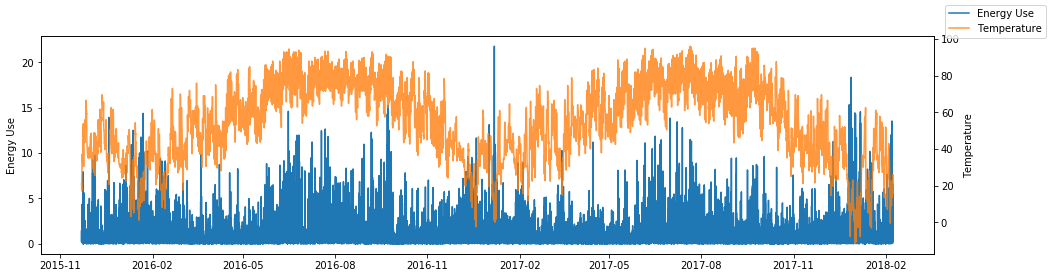

In [11]:
eemeter.plot_time_series(meter_data_hourly, temperature_data_hourly, figsize=(16, 4))

(<matplotlib.axes._subplots.AxesSubplot at 0x7eff3d6fc4e0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7eff3d6ba128>)

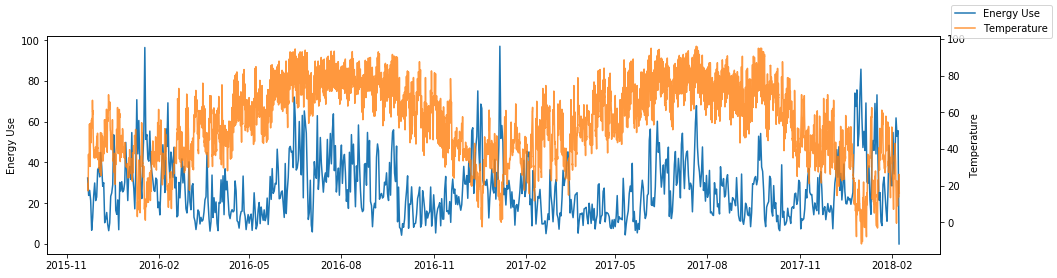

In [12]:
eemeter.plot_time_series(meter_data_daily, temperature_data_daily, figsize=(16, 4))

(<matplotlib.axes._subplots.AxesSubplot at 0x7eff3c62f240>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7eff3c5d4b00>)

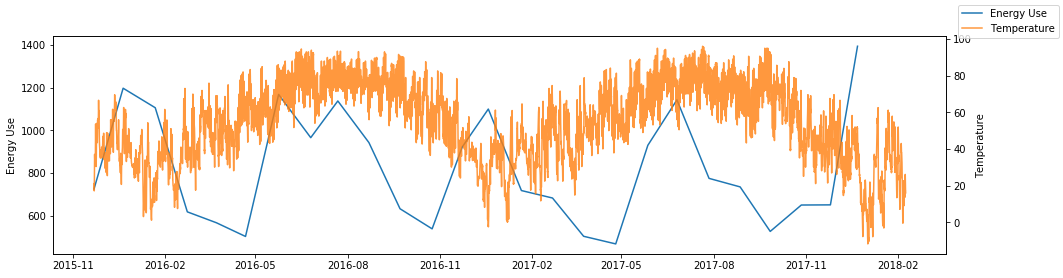

In [13]:
eemeter.plot_time_series(meter_data_billing, temperature_data_billing, figsize=(16, 4))

### Energy signature plots

The following plots the three version of the data - hourly, billing and daily - one on top of the other in energy signature form. This shows the temperature dependece of usage on external temperatures. These plots convert the meter data into "usage per day" format, which normalizes things and makes usage patterns appear roughly comparable at different sampling intervals. (Remember - this data is simulated!)

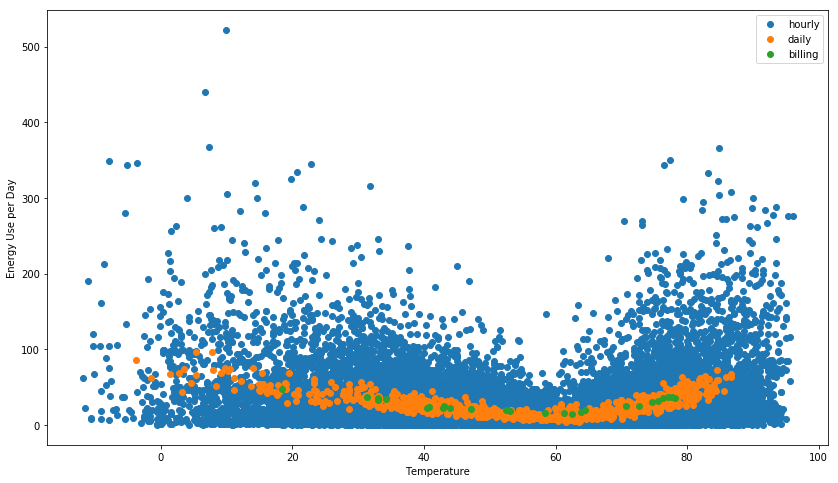

In [14]:
ax = eemeter.plot_energy_signature(meter_data_hourly, temperature_data_hourly, figsize=(14, 8))
eemeter.plot_energy_signature(meter_data_daily, temperature_data_daily, ax=ax)
eemeter.plot_energy_signature(meter_data_billing, temperature_data_billing, ax=ax)
ax.legend(labels=['hourly', 'daily', 'billing'])

## Filtering to a baseline data

We can also filter this meter data to contain just the baseline data.

In [15]:
baseline_meter_data_hourly, baseline_warnings_hourly = eemeter.get_baseline_data(
    meter_data_hourly, end=baseline_end_date, max_days=365)

baseline_meter_data_daily, baseline_warnings_daily = eemeter.get_baseline_data(
    meter_data_daily, end=baseline_end_date, max_days=365)

baseline_meter_data_billing, baseline_warnings_billing = eemeter.get_baseline_data(
    meter_data_billing, end=baseline_end_date, max_days=365)

In [16]:
baseline_meter_data_hourly.tail()

,value
start,
2016-12-25 20:00:00+00:00,0.14
2016-12-25 21:00:00+00:00,0.10
2016-12-25 22:00:00+00:00,0.19
2016-12-25 23:00:00+00:00,0.06
2016-12-26 00:00:00+00:00,NaN


In [17]:
baseline_meter_data_daily.tail()

,value
start,
2016-12-22 00:00:00+00:00,30.79
2016-12-23 00:00:00+00:00,28.74
2016-12-24 00:00:00+00:00,31.63
2016-12-25 00:00:00+00:00,26.45
2016-12-26 00:00:00+00:00,NaN


In [18]:
baseline_meter_data_billing.tail()

,value
start,
2016-08-22 06:00:00+00:00,942.15
2016-09-22 06:00:00+00:00,632.31
2016-10-24 06:00:00+00:00,538.24
2016-11-23 06:00:00+00:00,921.55
2016-12-19 06:00:00+00:00,NaN


If there had been any issues (e.g., unexpected gaps in the data) in filtering the data to the baseline period, some warnings would have been reported. This time we got off easy, but that will not always be the case in real-life datasets.

In [19]:
baseline_warnings_hourly, baseline_warnings_daily, baseline_warnings_billing

([], [], [])

## Creating CalTRACK Daily/Billing Method datasets

We start with this case because it's a bit simpler. Hourly datasets created below.

To make this into a dataset that can support analysis, we need to merge the meter data and temperature data into a single DataFrame. The `compute_usage_per_day_feature` function transforms the meter data into usage per day. The `compute_temperature_features` function lets us create a bunch of heating and cooling degree day values if we specify balance points to use. In this case, we'll use the wide balance point ranges recommended in the CalTRACK spec.

In [20]:
usage_per_day_daily = eemeter.compute_usage_per_day_feature(
    baseline_meter_data_daily, series_name='meter_value'
)
temperature_features_daily = eemeter.compute_temperature_features(
    baseline_meter_data_daily.index,
    temperature_data_daily,
    heating_balance_points=range(40, 81),  # a list like this [40, 41, 42, ... 79, 80]
    cooling_balance_points=range(50, 91),
    data_quality=True,  # add some measures of data quality so we can check data sufficiency later
)
design_matrix_daily = eemeter.merge_features([
    usage_per_day_daily,
    temperature_features_daily,
])

In [21]:
design_matrix_daily.tail()

,meter_value,temperature_not_null,temperature_null,temperature_mean,n_days_kept,n_days_dropped,cdd_50,cdd_51,cdd_52,cdd_53,...,hdd_71,hdd_72,hdd_73,hdd_74,hdd_75,hdd_76,hdd_77,hdd_78,hdd_79,hdd_80
start,,,,,,,,,,,,,,,,,,,,,
2016-12-22 00:00:00+00:00,30.79,24.0,0.0,37.755833,1.0,0.0,0.0,0.0,0.0,0.0,...,33.244167,34.244167,35.244167,36.244167,37.244167,38.244167,39.244167,40.244167,41.244167,42.244167
2016-12-23 00:00:00+00:00,28.74,24.0,0.0,34.483333,1.0,0.0,0.0,0.0,0.0,0.0,...,36.516667,37.516667,38.516667,39.516667,40.516667,41.516667,42.516667,43.516667,44.516667,45.516667
2016-12-24 00:00:00+00:00,31.63,24.0,0.0,40.632500,1.0,0.0,0.0,0.0,0.0,0.0,...,30.367500,31.367500,32.367500,33.367500,34.367500,35.367500,36.367500,37.367500,38.367500,39.367500
2016-12-25 00:00:00+00:00,26.45,24.0,0.0,39.362500,1.0,0.0,0.0,0.0,0.0,0.0,...,31.637500,32.637500,33.637500,34.637500,35.637500,36.637500,37.637500,38.637500,39.637500,40.637500
2016-12-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
design_matrix_daily.index.min(), design_matrix_daily.index.max()

(Timestamp('2015-12-27 00:00:00+0000', tz='UTC', freq='D'),
 Timestamp('2016-12-26 00:00:00+0000', tz='UTC', freq='D'))

In [23]:
import pandas as pd  # for timedelta

usage_per_day_billing = eemeter.compute_usage_per_day_feature(
    baseline_meter_data_billing, series_name='meter_value'
)
temperature_features_billing = eemeter.compute_temperature_features(
    baseline_meter_data_billing.index,
    temperature_data_billing,
    heating_balance_points=range(40, 81),  # a list like this [40, 41, 42, ... 79, 80]
    cooling_balance_points=range(50, 91),
    data_quality=True,  # add some measures of data quality so we can check data sufficiency later
    tolerance=pd.Timedelta('35D'),  # limit temperature data matching to periods of up to 35 days.
)
design_matrix_billing = eemeter.merge_features([
    usage_per_day_billing,
    temperature_features_billing,
])

In [24]:
design_matrix_billing.tail()

,meter_value,temperature_not_null,temperature_null,temperature_mean,n_days_kept,n_days_dropped,cdd_50,cdd_51,cdd_52,cdd_53,...,hdd_71,hdd_72,hdd_73,hdd_74,hdd_75,hdd_76,hdd_77,hdd_78,hdd_79,hdd_80
start,,,,,,,,,,,,,,,,,,,,,
2016-08-22 06:00:00+00:00,30.391935,744.0,0.0,74.667392,31.0,0.0,24.667392,23.667392,22.667392,21.667392,...,0.608118,0.848831,1.170874,1.622379,2.120833,2.749825,3.422339,4.103347,4.833065,5.609059
2016-09-22 06:00:00+00:00,19.759687,768.0,0.0,64.546667,32.0,0.0,14.637852,13.681497,12.759857,11.853607,...,7.743125,8.461875,9.188073,9.962005,10.789727,11.633477,12.511029,13.455221,14.453333,15.453333
2016-10-24 06:00:00+00:00,17.941333,720.0,0.0,53.130458,30.0,0.0,5.562833,4.901917,4.268583,3.668833,...,17.931722,18.874931,19.869542,20.869542,21.869542,22.869542,23.869542,24.869542,25.869542,26.869542
2016-11-23 06:00:00+00:00,35.444231,624.0,0.0,32.976378,26.0,0.0,0.001250,0.000000,0.000000,0.000000,...,38.023622,39.023622,40.023622,41.023622,42.023622,43.023622,44.023622,45.023622,46.023622,47.023622
2016-12-19 06:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
design_matrix_billing.index.min(), design_matrix_billing.index.max()

(Timestamp('2016-01-22 06:00:00+0000', tz='UTC'),
 Timestamp('2016-12-19 06:00:00+0000', tz='UTC'))

## Creating CalTRACK Hourly Method datasets

The hourly methods require a two-stage dataset creation process because it segments the dataset into weighted groups by month and uses some preliminary features in fitting subsequent features.

### Creating a preliminary dataset

The preliminary dataset has some simple time and temperature features. These features do not vary by segment and are precursors to other features (See below for a better explanation of segmentation). This step looks a lot like the daily/billing dataset creation.

In [26]:
time_features_hourly = eemeter.compute_time_features(
    baseline_meter_data_hourly.index
)
temperature_features_hourly = eemeter.compute_temperature_features(
    baseline_meter_data_hourly.index, temperature_data_hourly,
    heating_balance_points=[50], cooling_balance_points=[65],
    degree_day_method='hourly'
)
preliminary_design_matrix_hourly = eemeter.merge_features([  # not sure how to represent this in platform
    baseline_meter_data_hourly.value.to_frame('meter_value'),
    temperature_features_hourly,
    time_features_hourly,
])

In [27]:
preliminary_design_matrix_hourly.tail()

,meter_value,temperature_mean,cdd_65,hdd_50,hour_of_week
start,,,,,
2016-12-25 20:00:00+00:00,0.14,42.30,0.0,7.70,165.0
2016-12-25 21:00:00+00:00,0.10,42.99,0.0,7.01,166.0
2016-12-25 22:00:00+00:00,0.19,43.65,0.0,6.35,167.0
2016-12-25 23:00:00+00:00,0.06,44.64,0.0,5.36,168.0
2016-12-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN


### Segmentation

Starting with the preliminary dataset, we now create a dataset of segmentation weights. We will use this to create 12 independent hourly models - one for each month of the calendar year.

This segmentation matrix contains 1 column for each segment (12 in all), each of which contains the segmentation weights for that column. The segmentation scheme we use here is to have one segmentation for each month which contains a fully weighted calendar month and half-weighted neighboring months.

In [28]:
segmentation_hourly = eemeter.segment_time_series(
    preliminary_design_matrix_hourly.index, 'three_month_weighted')
segmentation_hourly.head()

,dec-jan-feb-weighted,jan-feb-mar-weighted,feb-mar-apr-weighted,mar-apr-may-weighted,apr-may-jun-weighted,may-jun-jul-weighted,jun-jul-aug-weighted,jul-aug-sep-weighted,aug-sep-oct-weighted,sep-oct-nov-weighted,oct-nov-dec-weighted,nov-dec-jan-weighted
start,,,,,,,,,,,,
2015-12-27 00:00:00+00:00,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0
2015-12-27 01:00:00+00:00,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0
2015-12-27 02:00:00+00:00,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0
2015-12-27 03:00:00+00:00,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0
2015-12-27 04:00:00+00:00,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0


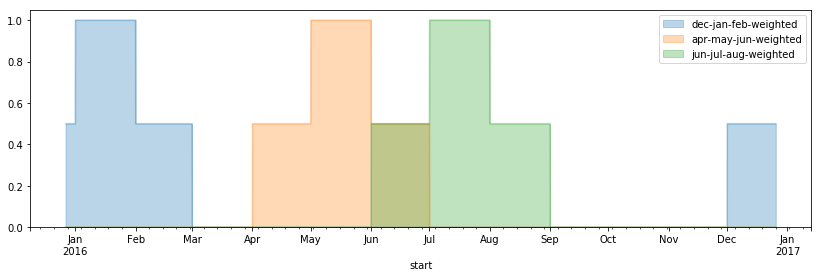

In [29]:
# example segmentation weights
segmentation_hourly[[
    'dec-jan-feb-weighted',
    'apr-may-jun-weighted',
    'jun-jul-aug-weighted'
]].plot.area(stacked=False, alpha=0.3, figsize=(14, 4))

### Fitting segmented occupancy lookups

Occupancy is estimated by building a simple model from the preliminary design matrix. This is done for each segment independently, so results are returned as a dataframe with one segment of results per column.

In [30]:
occupancy_lookup_hourly = eemeter.estimate_hour_of_week_occupancy(
    preliminary_design_matrix_hourly,
    segmentation=segmentation_hourly
)
occupancy_lookup_hourly.head()

,dec-jan-feb-weighted,jan-feb-mar-weighted,feb-mar-apr-weighted,mar-apr-may-weighted,apr-may-jun-weighted,may-jun-jul-weighted,jun-jul-aug-weighted,jul-aug-sep-weighted,aug-sep-oct-weighted,sep-oct-nov-weighted,oct-nov-dec-weighted,nov-dec-jan-weighted
hour_of_week,,,,,,,,,,,,
1,0,0,0,0,0,0,0,1,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,0,0
5,0,0,0,1,1,1,0,0,0,0,0,0


### Fitting segmented temperature bins

Temperature bins are also fit such that each bin has sufficient temperature reading counts. This is also done for each segment, so, like above, results are also returned as a dataframe with one segment of results per column.

In [31]:
temperature_bins_hourly = eemeter.fit_temperature_bins(
    preliminary_design_matrix_hourly,
    segmentation=segmentation_hourly,
    default_bins=[30, 45, 55, 65, 75, 90],
    min_temperature_count=20
)
temperature_bins_hourly

,dec-jan-feb-weighted,jan-feb-mar-weighted,feb-mar-apr-weighted,mar-apr-may-weighted,apr-may-jun-weighted,may-jun-jul-weighted,jun-jul-aug-weighted,jul-aug-sep-weighted,aug-sep-oct-weighted,sep-oct-nov-weighted,oct-nov-dec-weighted,nov-dec-jan-weighted
bin_endpoints,,,,,,,,,,,,
30,True,True,True,True,False,False,False,False,False,True,True,True
45,True,True,True,True,True,False,False,False,True,True,True,True
55,True,True,True,True,True,True,False,False,True,True,True,True
65,False,True,True,True,True,True,True,True,True,True,True,True
75,False,False,True,True,True,True,True,True,True,True,True,False
90,False,False,False,False,True,True,True,True,True,False,False,False


With these in hand, now we can combine them into a segmented dataset using the helper function `iterate_segmented_dataset` and a prefabricated feature processor `caltrack_hourly_fit_feature_processor` which is provided to assist creating the segmented dataset given a preliminary design matrix of the form created above. The feature processor transforms the each segment of the dataset using the occupancy lookup and temperature bins created above.

In [32]:
segmented_design_matrices_hourly = {
    segment_name: segmented_data
    for segment_name, segmented_data in eemeter.iterate_segmented_dataset(
        preliminary_design_matrix_hourly, segmentation=segmentation_hourly,
        feature_processor=eemeter.caltrack_hourly_fit_feature_processor,
        feature_processor_kwargs={
            'occupancy_lookup': occupancy_lookup_hourly,
            'temperature_bins': temperature_bins_hourly,
        },
    )
}

## Running the CalTRACK Billing/Daily Methods

The following use the design matrices that we created in the previous steps and uses them with the CalTRACK method. This gives us a baseline model, which we will dig into a bit.

In [33]:
baseline_model_fit_daily = eemeter.caltrack_method(
    design_matrix_daily,
)

In [34]:
baseline_model_fit_billing = eemeter.caltrack_method(
    design_matrix_billing,
    use_billing_presets=True,
    weights_col='n_days_kept',
)

/usr/local/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


## Running the CalTRACK Hourly Methods

In [39]:
# TODO make a helper method for this which provides the static defaults.

baseline_model_fit_hourly = eemeter.fit_segmented_model(
    segmented_design_matrices_hourly,
    eemeter.fit_hourly_model_segment,
    prediction_segment_type='one_month',
    prediction_segment_name_mapping={
        'jan': 'dec-jan-feb-weighted',
        'feb': 'jan-feb-mar-weighted',
        'mar': 'feb-mar-apr-weighted',
        'apr': 'mar-apr-may-weighted',
        'may': 'apr-may-jun-weighted',
        'jun': 'may-jun-jul-weighted',
        'jul': 'jun-jul-aug-weighted',
        'aug': 'jul-aug-sep-weighted',
        'sep': 'aug-sep-oct-weighted',
        'oct': 'sep-oct-nov-weighted',
        'nov': 'oct-nov-dec-weighted',
        'dec': 'nov-dec-jan-weighted',
    },
    prediction_feature_processor=eemeter.caltrack_hourly_prediction_feature_processor,
    prediction_feature_processor_kwargs={
        'occupancy_lookup': occupancy_lookup_hourly,
        'temperature_bins': temperature_bins_hourly,
    },
)

TODO: add prediction sections

## Plotting (part 2)

### Daily and billing method plots

To see what this model fit looks like, we can plot the result against the energy signature.

ValueError: x and y must have same first dimension, but have shapes (62,) and (3,)

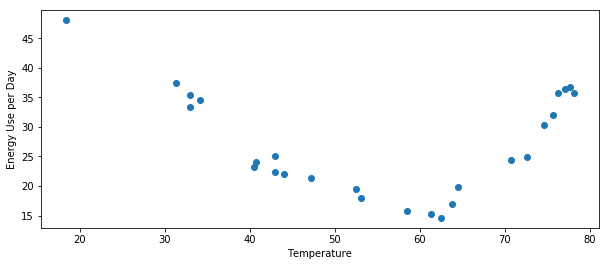

In [36]:
ax = eemeter.plot_energy_signature(meter_data_billing, temperature_data_billing)
baseline_model_fit_billing.plot(ax=ax, temp_range=(18, 80))

In [ ]:
ax = eemeter.plot_energy_signature(meter_data_daily, temperature_data_daily)
baseline_model_fit_daily.plot(ax=ax, temp_range=(-5, 88))

We can also compare the two models and see that there is a slight, but not drastic, difference between them.

In [ ]:
ax = baseline_model_fit_daily.model.plot(color='C0', best=True, label='daily')
ax = baseline_model_fit_billing.model.plot(ax=ax, color='C1', best=True, label='billing')
ax.legend()

If we're interested in seeing more about models the CalTRACK method tried, we can even plot all the model candidates as well. There are a ton of these, so the reduced alpha makes it a bit easier to see what's going on. Each faint line represents a model that was tried and bested by the (orange) selected model, which had the highest r-squared. Candidates appear green if `QUALIFIED` and red if `DISQUALIFIED`.  A model might be disqualified if it had unphysical (i.e., negative) coefficients.

In [ ]:
ax = eemeter.plot_energy_signature(meter_data_billing, temperature_data_billing)
baseline_model_fit_billing.plot(
    ax=ax, candidate_alpha=0.02,
    with_candidates=True, temp_range=(18, 80))

In [ ]:
ax = eemeter.plot_energy_signature(meter_data_daily, temperature_data_daily)
baseline_model_fit_daily.plot(
    ax=ax, candidate_alpha=0.02,
    with_candidates=True, temp_range=(-5, 88))

## CalTRACK Hourly plots (TODO)

## ModelFit object: status, candidates, warnings, json


In addition to being plottable, the model_fit object is an instance of the class [eemeter.ModelFit](http://eemeter.openee.io/api.html#eemeter.ModelFit) and contains a bunch of interesting information about this modeling process. 

For instance, there's a status. This status is one of the following:

- `'SUCCESS'`: qualified model selected.
- `'NO MODEL'`: no candidate models qualified.
- `'NO DATA'`: no data was given.

In [ ]:
baseline_model_fit_billing.status, baseline_model_fit_daily.status

There is also a "best" candidate model:

In [ ]:
baseline_model_fit_billing.model, baseline_model_fit_daily.model

And a list of all candidate models that were tried, many of which have (much) lower r-squared than the best model.

In [ ]:
baseline_model_fit_billing.candidates[:5]  # (there are a lot, so only showing the first 5)

In [ ]:
baseline_model_fit_daily.candidates[:5] 

Any associated warnings on both the model_fit object and the best candidate model object:

In [ ]:
baseline_model_fit_billing.warnings, baseline_model_fit_billing.model.warnings

In [ ]:
baseline_model_fit_daily.warnings, baseline_model_fit_daily.model.warnings

The best models don't appear to have any issues but the billing model did (see the faint red lines in the chart above).

In [ ]:
disqualified_candidates = [
    candidate
    for candidate in baseline_model_fit_billing.candidates
    if candidate.status == 'DISQUALIFIED'
]  # this is a python list comprehension
disqualified_candidates[:10]

The warnings associated with the disqualified candidates will be a bit more interesting. For instance, this one was disqualified because the 'beta_hdd' parameter was negative, which is unphysicial behavior that the CalTRACK working group should be considered to be evidence of overfitting:

In [ ]:
import json  # for nice indentation
warning = disqualified_candidates[0].warnings[0]
print(json.dumps(warning.json(), indent=2))

The whole model can be serialized. The `.json(with_candidates=True)` flag will also serialize all candidate models results:

In [ ]:
print(json.dumps(baseline_model_fit_billing.json(), indent=2))

In [ ]:
print(json.dumps(baseline_model_fit_daily.json(), indent=2))

## CalTRACK Data Sufficiency

Another important part of the CalTRACK methods are the data sufficiency requirements. We can check the data sufficiency requirements of our baseline data. Note that we include the requested end dates to indicate the _intended_ extent of the period should stop at the baseline end date.

In [ ]:
baseline_data_sufficiency_billing = eemeter.caltrack_sufficiency_criteria(
    baseline_data_billing, requested_start=None, requested_end=baseline_end_date)

baseline_data_sufficiency_daily = eemeter.caltrack_sufficiency_criteria(
    baseline_data_daily, requested_start=None, requested_end=baseline_end_date)

In [ ]:
baseline_data_sufficiency_billing.warnings

In [ ]:
baseline_data_sufficiency_daily.warnings

These warnings carry useful information about the extent of the data sufficiency issues:

In [ ]:
print(json.dumps(baseline_data_sufficiency_billing.json(), indent=2))

In [ ]:
print(json.dumps(baseline_data_sufficiency_daily.json(), indent=2))

## Reporting period metered savings

Now that we have a handle on our data sufficiency, we can now take this baseline model and project forward into the reporting period. This will allow us to calculate metered savings for the reporting period.

First, we need a reporting period. The following gets the reporting period date.

In [ ]:
reporting_start_date = metadata_billing['blackout_start_date']

Now we filter data for that period:

In [ ]:
reporting_meter_data_billing, warnings = eemeter.get_reporting_data(
    meter_data_billing, start=reporting_start_date, max_days=365)

reporting_meter_data_daily, warnings = eemeter.get_reporting_data(
    meter_data_daily, start=reporting_start_date, max_days=365)

The `eemeter.caltrack_metered_savings` method performs the logic of estimating counterfactual baseline reporting period usage. For this, it requires the fitted baseline model, the reporting period meter data (for its index - so that it can be properly joined later), and corresponding temperature data. Note that this method can return results disaggregated into base load, cooling load, or heating load or as the aggregated usage. We do both here for demonstration purposes.

In [ ]:
metered_savings_billing = eemeter.caltrack_metered_savings(
    baseline_model_fit_billing.model, reporting_meter_data_billing,
    temperature_data_billing, with_disaggregated=True
)

metered_savings_daily = eemeter.caltrack_metered_savings(
    baseline_model_fit_daily.model, reporting_meter_data_daily,
    temperature_data_daily, with_disaggregated=True
)

We can join these all into a convenient dataframe.

In [ ]:
metered_savings_billing

In [ ]:
metered_savings_billing.plot(figsize=(10, 6))

In [ ]:
metered_savings_daily.head()

In [ ]:
metered_savings_daily.plot(figsize=(10, 6))

And compute metered savings!

In [ ]:
total_savings_billing = metered_savings_billing.metered_savings.sum()
percent_savings_billing = total_savings_billing / metered_savings_billing.counterfactual_usage.sum() * 100
print('Billing: Saved {:.1f} kWh in first year ({:.1f}%)'.format(total_savings_billing, percent_savings_billing))

total_savings_daily = metered_savings_daily.metered_savings.sum()
percent_savings_daily = total_savings_daily / metered_savings_daily.counterfactual_usage.sum() * 100
print('Daily: Saved {:.1f} kWh in first year ({:.1f}%)'.format(total_savings_daily, percent_savings_daily))

**NOTE**: These results differ somewhat due to the different lengths of the reporting periods - the billing version of the reporting period was a bit shorter because the billing periods over which we computed savings didn't exactly align with 365 day period we requested, as they did for the daily reporting period data.

## Annual weather-normalized modeled savings

If we want to compute annual weather normalized modeled savings, we'll need a reporting period model. The following code repeats what we did for the baseline period with the reporting period.

In [ ]:
reporting_data_billing = eemeter.merge_temperature_data(
    reporting_meter_data_billing, temperature_data_billing,
    heating_balance_points=range(40, 81),  # a list like this [40, 41, 42, ... 79, 80]
    cooling_balance_points=range(50, 91),
    data_quality=True,  # add some measures of data quality so we can check data sufficiency later
    tolerance=pd.Timedelta('35D'),
)

reporting_data_daily = eemeter.merge_temperature_data(
    reporting_meter_data_daily, temperature_data_daily,
    heating_balance_points=range(40, 81),  # a list like this [40, 41, 42, ... 79, 80]
    cooling_balance_points=range(50, 91),
    data_quality=True,  # add some measures of data quality so we can check data sufficiency later
)

In [ ]:
reporting_model_fit_billing = eemeter.caltrack_method(
    reporting_data_billing,
    use_billing_presets=True,
    weights_col='n_days_kept',
)
reporting_model_fit_daily = eemeter.caltrack_method(
    reporting_data_daily,
)

In [ ]:
ax = eemeter.plot_energy_signature(meter_data_billing, temperature_data_billing)
ax = baseline_model_fit_billing.model.plot(ax=ax, color='C1', best=True, label='baseline', temp_range=(18, 80))
ax = reporting_model_fit_billing.model.plot(ax=ax, color='C2', best=True, label='reporting', temp_range=(18, 80))
ax.legend()

In [ ]:
ax = eemeter.plot_energy_signature(meter_data_daily, temperature_data_daily)
ax = baseline_model_fit_daily.model.plot(ax=ax, color='C1', best=True, label='baseline', temp_range=(-5, 88))
ax = reporting_model_fit_daily.model.plot(ax=ax, color='C2', best=True, label='reporting', temp_range=(-5, 88))
ax.legend()

The last thing we need to do before obtaining annualized and weather-normalized results is to obtain normal year temperature data. For simplicity, let's just call 2017 our "normal year". To be completely clear, this is not something you would do in practice, but this demonstrates the functionality. To use real temperature normals, check out the [EEWeather](http://eeweather.openee.io/) package.

In [ ]:
normal_year_temperatures = temperature_data_daily[temperature_data_daily.index.year == 2017]
result_index = pd.date_range('2017-01-01', periods=365, tz='UTC')

Now we are ready to obtain our annualized savings.

In [ ]:
annualized_savings_billing = eemeter.caltrack_modeled_savings(
    baseline_model_fit_billing.model, reporting_model_fit_billing.model,
    result_index, normal_year_temperatures, with_disaggregated=True
)

annualized_savings_daily = eemeter.caltrack_modeled_savings(
    baseline_model_fit_daily.model, reporting_model_fit_daily.model,
    result_index, normal_year_temperatures, with_disaggregated=True
)

In [ ]:
annualized_savings_billing.head()

The following plot demonstrates that in this case, the billing model represents most of the modeled savings as base load savings. This reflects the behavior seen in the model comparison above.

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 1, figsize=(10, 16))

annualized_savings_billing[[
    'modeled_baseline_usage',
    'modeled_reporting_usage',
    'modeled_savings',
]].plot(ax=axes[0])
axes[0].set_title('Total normalized/annualized savings')

annualized_savings_billing[[
    'modeled_baseline_cooling_load',
    'modeled_reporting_cooling_load',
    'modeled_cooling_load_savings',
]].plot(ax=axes[1])
axes[1].set_title('Modeled cooling load savings')

annualized_savings_billing[[
    'modeled_baseline_heating_load',
    'modeled_reporting_heating_load',
    'modeled_heating_load_savings',
]].plot(ax=axes[2])
axes[2].set_title('Modeled heating load savings')

ax = annualized_savings_billing[[
    'modeled_baseline_base_load',
    'modeled_reporting_base_load',
    'modeled_base_load_savings',
]].plot(ax=axes[3])
axes[3].set_title('Modeled base load savings')
lim = axes[3].set_ylim((0, None))

plt.show()

In [ ]:
annualized_savings_daily.head()

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 1, figsize=(10, 16))

annualized_savings_daily[[
    'modeled_baseline_usage',
    'modeled_reporting_usage',
    'modeled_savings',
]].plot(ax=axes[0])
axes[0].set_title('Total normalized/annualized savings')

annualized_savings_daily[[
    'modeled_baseline_cooling_load',
    'modeled_reporting_cooling_load',
    'modeled_cooling_load_savings',
]].plot(ax=axes[1])
axes[1].set_title('Modeled cooling load savings')

annualized_savings_daily[[
    'modeled_baseline_heating_load',
    'modeled_reporting_heating_load',
    'modeled_heating_load_savings',
]].plot(ax=axes[2])
axes[2].set_title('Modeled heating load savings')

ax = annualized_savings_daily[[
    'modeled_baseline_base_load',
    'modeled_reporting_base_load',
    'modeled_base_load_savings',
]].plot(ax=axes[3])
axes[3].set_title('Modeled base load savings')
lim = axes[3].set_ylim((0, None))

plt.show()

In this case, as totals, the annualized savings look pretty similar to the metered savings.

In [ ]:
total_savings_billing = annualized_savings_billing.modeled_savings.sum()
percent_savings_billing = total_savings_billing / annualized_savings_billing.modeled_baseline_usage.sum() * 100
print('Billing: Saved {:.1f} kWh in first year ({:.1f}%)'.format(total_savings_billing, percent_savings_billing))

total_savings_daily = annualized_savings_daily.modeled_savings.sum()
percent_savings_daily = total_savings_daily / annualized_savings_daily.modeled_baseline_usage.sum() * 100
print('Daily: Saved {:.1f} kWh in first year ({:.1f}%)'.format(total_savings_daily, percent_savings_daily))

Next steps
----------

Congrats! You've finished the basic tutorial. The following are all highly recommended as ways to learn more about open energy efficiency metering:

 - Read the docs at http://eemeter.openee.io
 - Match sites or obtain weather data from public sources with [EEWeather](http://eeweather.openee.io)
 - Try out the eemeter on your own data. You might find these useful: [eemeter data loading methods](http://eemeter.openee.io/api.html#data-loading)
 - Try another sample.

The following prints the names of the other samples to try out with this notebook, if interested:

In [ ]:
eemeter.samples()